In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,classification_report
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import string
import nltk

In [3]:
train_path = 'train_data.txt'
df = pd.read_csv(train_path,sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
df.head(10)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
df.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [6]:
df.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [7]:
test_data = pd.read_csv('test_data.txt',sep=':::',names=['Title','Description'],engine='python')
test_data.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [9]:
test_data.describe()

,Title,Description
count,54200,54200
unique,54200,54072
top,Edgar's Lunch (1998),Grammy - music award of the American academy ...
freq,1,10


In [10]:
test_data.isnull().sum()

Title          0
Description    0
dtype: int64

In [11]:
train_data = df.drop_duplicates()
test_data.drop_duplicates(inplace=True)

In [12]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [13]:
test_data.describe()

,Title,Description
count,54200,54200
unique,54200,54072
top,Edgar's Lunch (1998),Grammy - music award of the American academy ...
freq,1,10


In [14]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Function to clean description
def clean_description(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    return text

# Apply cleaning function to Description column
train_data['Clean_Description'] = train_data['Description'].apply(clean_description)

C:\Users\Pratham Vyas\AppData\Local\Temp\ipykernel_9956\4176952075.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y="Genre", order=train_data["Genre"].value_counts().index, palette=palette)
C:\Users\Pratham Vyas\AppData\Local\Temp\ipykernel_9956\4176952075.py:5: UserWarning: 
The palette list has fewer values (6) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=train_data, y="Genre", order=train_data["Genre"].value_counts().index, palette=palette)


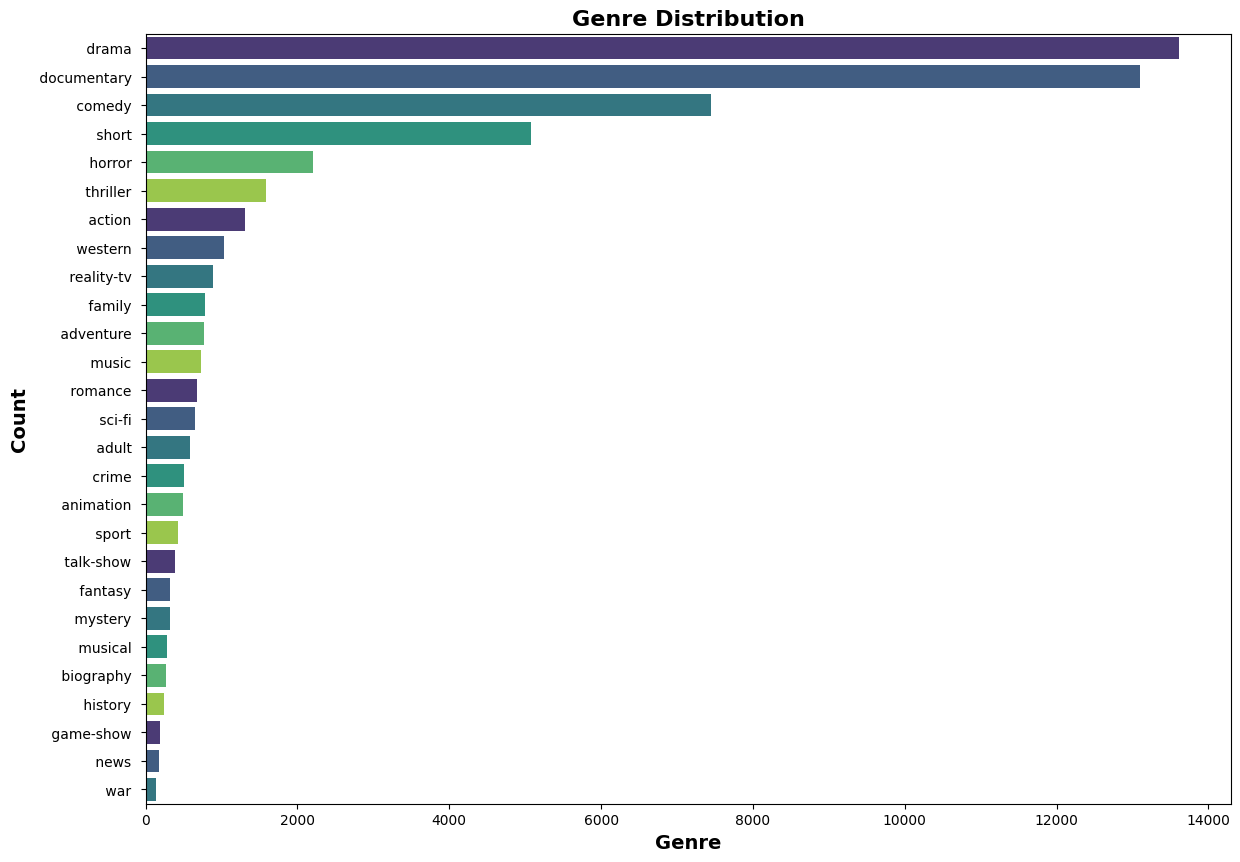

In [15]:
# Plot genre counts
palette = sns.color_palette("viridis")

plt.figure(figsize=(14,10))
sns.countplot(data=train_data, y="Genre", order=train_data["Genre"].value_counts().index, palette=palette)
plt.xlabel('Genre', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(fontsize=10)
plt.title('Genre Distribution',fontsize=16,fontweight='bold')
plt.show()

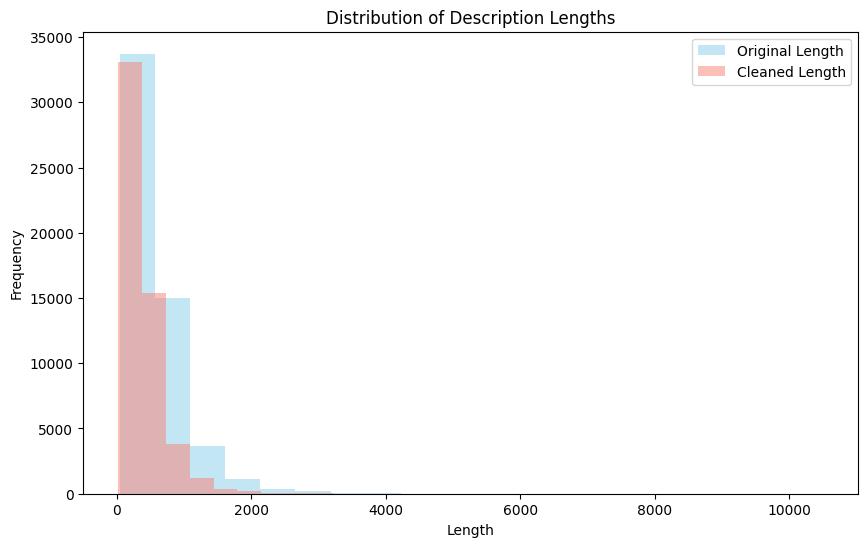

Total characters removed during cleaning: 10382965


In [16]:
# Calculate length of original and cleaned descriptions
train_data['Original_Length'] = train_data['Description'].apply(len)
train_data['Cleaned_Length'] = train_data['Clean_Description'].apply(len)

# Plotting
plt.figure(figsize=(10, 6))

# Plot original lengths
plt.hist(train_data['Original_Length'], bins=20, color='skyblue', alpha=0.5, label='Original Length')

# Plot cleaned lengths
plt.hist(train_data['Cleaned_Length'], bins=20, color='salmon', alpha=0.5, label='Cleaned Length')

plt.title('Distribution of Description Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# Calculate count of removed characters
removed_characters = sum(train_data['Original_Length'] - train_data['Cleaned_Length'])
print("Total characters removed during cleaning:", removed_characters)

In [17]:
# Splitting the data into train and validation sets
X = train_data['Clean_Description']
y = train_data['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [18]:
# Convert text to numerical features using TF-IDF
vectorize = TfidfVectorizer()
X_train_tfidf  = vectorize.fit_transform(X_train)
X_test_tfidf  = vectorize.transform(X_test)

In [19]:
# Support Vector Machine classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [20]:
# Predictions
y_pred = svm_classifier.predict(X_test_tfidf) 
# Evaluation
print(classification_report(y_test, y_pred))

C:\Users\Pratham Vyas\anaconda3\envs\tutorial\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.53      0.37      0.44       339
       adult        0.77      0.40      0.53       135
   adventure        0.49      0.21      0.29       178
   animation        0.58      0.11      0.19       126
   biography        0.00      0.00      0.00        75
      comedy        0.53      0.60      0.56      1814
       crime        0.18      0.01      0.03       142
 documentary        0.68      0.85      0.76      3296
       drama        0.55      0.78      0.64      3374
      family        0.43      0.11      0.17       187
     fantasy        0.67      0.04      0.08        90
   game-show        0.87      0.55      0.68        49
     history        0.00      0.00      0.00        61
      horror        0.68      0.63      0.66       532
       music        0.65      0.49      0.56       178
     musical        0.60      0.05      0.09        61
     mystery        1.00      0.01      0.03        77
        n

C:\Users\Pratham Vyas\anaconda3\envs\tutorial\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pratham Vyas\anaconda3\envs\tutorial\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
valAccuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", valAccuracy)

Validation Accuracy: 0.5949535192563081


In [23]:
#training the model for entire training dataset
train_data.head()

,Title,Genre,Description,Clean_Description,Original_Length,Cleaned_Length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...,546,383
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,184,119
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,650,402
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,1082,745
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...,625,402


In [26]:
X_test = test_data['Description']
X_train_tfidf  = vectorize.fit_transform(X)
X_test_tfidf  = vectorize.transform(X_test)

In [27]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y)

SVC(kernel='linear')

In [29]:
test_data_solution = pd.read_csv('test_data_solution.txt',sep=':::',names=['Title','Genre','Description'],engine='python')
y_test = test_data_solution['Genre']
# Predictions
y_pred = svm_classifier.predict(X_test_tfidf) 
# Evaluation
print(classification_report(y_test, y_pred)) 
valAccuracy = accuracy_score(y_test, y_pred)
print("\n\nAccuracy:", valAccuracy)

C:\Users\Pratham Vyas\anaconda3\envs\tutorial\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pratham Vyas\anaconda3\envs\tutorial\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.47      0.36      0.41      1314
       adult        0.65      0.40      0.50       590
   adventure        0.58      0.23      0.33       775
   animation        0.52      0.12      0.20       498
   biography        0.00      0.00      0.00       264
      comedy        0.56      0.59      0.57      7446
       crime        0.32      0.04      0.07       505
 documentary        0.69      0.86      0.76     13096
       drama        0.55      0.78      0.65     13612
      family        0.52      0.11      0.19       783
     fantasy        0.36      0.06      0.10       322
   game-show        0.86      0.61      0.71       193
     history        0.00      0.00      0.00       243
      horror        0.67      0.61      0.64      2204
       music        0.69      0.50      0.58       731
     musical        0.29      0.02      0.03       276
     mystery        0.38      0.02      0.03       318
        n

C:\Users\Pratham Vyas\anaconda3\envs\tutorial\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
